# <center>SMA_LAB_11-Analysing real time datasets using networkx package</center> 

**Exercise 1: Modelling road network of Indian cities**

1. Import networkx and matplotlib libraries
2. Initialise an Undirected Null graph and make a list of cities and make these cities as nodes 
3. Plot the cities
4. Create edges among the cities and create weights for the edges 
5. Build a road network from the created edges 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy.random import choice 
import numpy as np

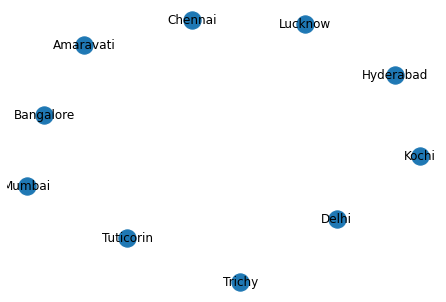

In [2]:
G = nx.Graph()                             #Undirected NULL graph
#G = nx.DiGraph() #Directed Graph
cities = ['Delhi', 'Trichy', 'Mumbai', 'Tuticorin', 'Chennai', 'Kochi', 'Hyderabad', 'Bangalore', 'Lucknow', 'Amaravati']
for city in cities:
    G.add_node(city)
nx.draw(G, with_labels=1)
plt.show()

In [3]:
costs = [np.random.randint(50, 1000) for x in range(10) ]
print(costs)
print(len(costs))
print("Edges : ", G.number_of_edges())
print("Nodes : ", G.number_of_nodes())

[361, 854, 780, 896, 387, 425, 421, 569, 609, 58]
10
Edges :  0
Nodes :  10


[('Trichy', 'Chennai'), ('Trichy', 'Kochi'), ('Mumbai', 'Chennai'), ('Mumbai', 'Amaravati'), ('Tuticorin', 'Kochi'), ('Tuticorin', 'Amaravati'), ('Chennai', 'Lucknow'), ('Chennai', 'Bangalore'), ('Kochi', 'Bangalore'), ('Kochi', 'Lucknow')]


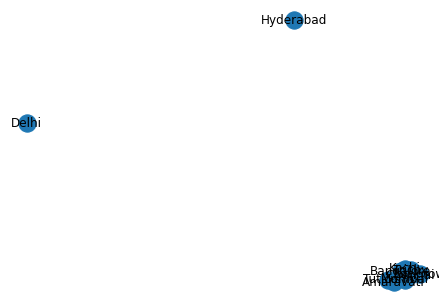

In [4]:
while(G.number_of_edges() != 10):
    city1 = choice(G.nodes())
    city2 = choice(G.nodes())
    wt = choice(costs)                                          #selecting random costs
    if city1 != city2 and G.has_edge(city1, city2) == 0:
        G.add_edge(city1, city2, weight = wt)
print(G.edges())
nx.draw(G, with_labels=1)
plt.show()

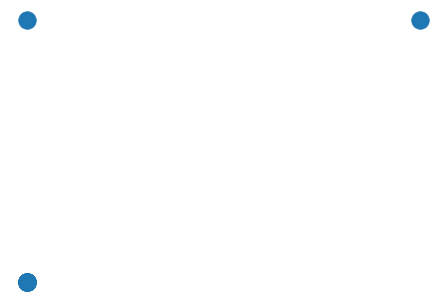

In [5]:
pos = nx.spectral_layout(G)
nx.draw(G, pos)
plt.show()

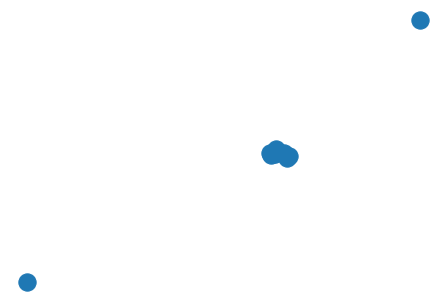

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

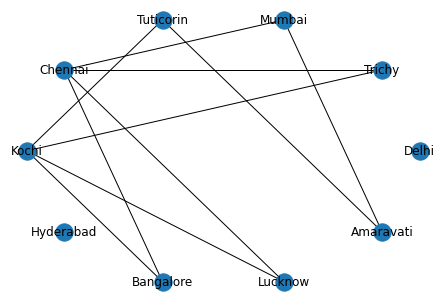

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

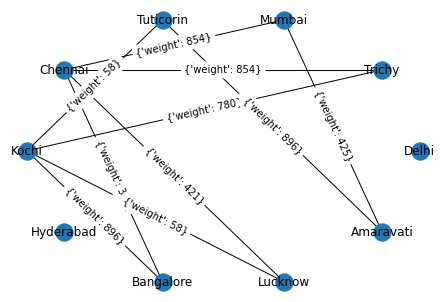

In [8]:
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [9]:
print (nx.is_connected(G))

False


In [10]:
for u in G.nodes():
    for v in G.nodes():
        print (u, v, nx.has_path(G, u, v))

Delhi Delhi True
Delhi Trichy False
Delhi Mumbai False
Delhi Tuticorin False
Delhi Chennai False
Delhi Kochi False
Delhi Hyderabad False
Delhi Bangalore False
Delhi Lucknow False
Delhi Amaravati False
Trichy Delhi False
Trichy Trichy True
Trichy Mumbai True
Trichy Tuticorin True
Trichy Chennai True
Trichy Kochi True
Trichy Hyderabad False
Trichy Bangalore True
Trichy Lucknow True
Trichy Amaravati True
Mumbai Delhi False
Mumbai Trichy True
Mumbai Mumbai True
Mumbai Tuticorin True
Mumbai Chennai True
Mumbai Kochi True
Mumbai Hyderabad False
Mumbai Bangalore True
Mumbai Lucknow True
Mumbai Amaravati True
Tuticorin Delhi False
Tuticorin Trichy True
Tuticorin Mumbai True
Tuticorin Tuticorin True
Tuticorin Chennai True
Tuticorin Kochi True
Tuticorin Hyderabad False
Tuticorin Bangalore True
Tuticorin Lucknow True
Tuticorin Amaravati True
Chennai Delhi False
Chennai Trichy True
Chennai Mumbai True
Chennai Tuticorin True
Chennai Chennai True
Chennai Kochi True
Chennai Hyderabad False
Chennai Ba

8


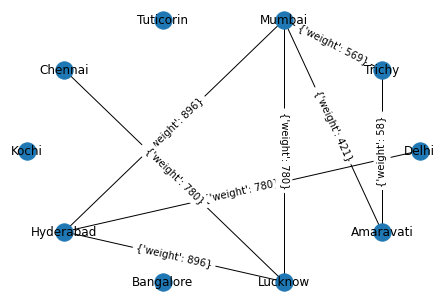

In [11]:
def create_network(cities, costs, numberOfLinks):
    G = nx.Graph()
    for city in cities:
        G.add_node(city)
    while(G.number_of_edges() < numberOfLinks):
        city1 = choice(G.nodes())
        city2 = choice(G.nodes())
        if city1 != city2 and G.has_edge(city1, city2) == 0:
            G.add_edge(city1, city2, weight = choice(costs))
    return G

G = create_network(cities, costs, 8)
print (G.number_of_edges())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()


In [12]:
G.add_edge('Tuticorin', 'Hyderabad', weight = choice(costs))
print (nx.dijkstra_path(G, 'Tuticorin', 'Hyderabad'))# source and destination
print (nx.dijkstra_path_length(G,'Tuticorin', 'Hyderabad'))

['Tuticorin', 'Hyderabad']
421


In [13]:
print (nx.single_source_dijkstra_path(G, 'Hyderabad'))# source
print (nx.single_source_dijkstra_path_length(G,'Hyderabad'))

{'Hyderabad': ['Hyderabad'], 'Lucknow': ['Hyderabad', 'Lucknow'], 'Mumbai': ['Hyderabad', 'Mumbai'], 'Delhi': ['Hyderabad', 'Delhi'], 'Tuticorin': ['Hyderabad', 'Tuticorin'], 'Chennai': ['Hyderabad', 'Lucknow', 'Chennai'], 'Trichy': ['Hyderabad', 'Mumbai', 'Amaravati', 'Trichy'], 'Amaravati': ['Hyderabad', 'Mumbai', 'Amaravati']}
{'Hyderabad': 0, 'Tuticorin': 421, 'Delhi': 780, 'Lucknow': 896, 'Mumbai': 896, 'Amaravati': 1317, 'Trichy': 1375, 'Chennai': 1676}


In [14]:
x = [0]
y = [99999999]
cnt = 0
def make_random_road(cnt):
    cnt = cnt + 1
    city1 = choice(G.nodes())
    city2 = choice(G.nodes())
    wt = choice(costs)
    G.add_edge(city1, city2, weight = wt)
    try:
        distance = nx.dijkstra_path_length(G, 'Trichy', 'Delhi')
        x.append(cnt)
        y.append(distance)
        return cnt
    except:

        print (cnt, "Still no path....")
        x.append(cnt)
        y.append(99999999)
        cnt += 1
        make_random_road(cnt)

In [15]:
make_random_road(0)

1

In [16]:
print (nx.dijkstra_path(G, 'Delhi', 'Trichy'))
print (nx.dijkstra_path_length(G, 'Delhi', 'Trichy'))

['Delhi', 'Hyderabad', 'Mumbai', 'Amaravati', 'Trichy']
2155


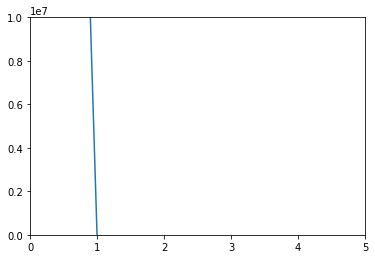

In [17]:
plt.plot(x, y)
plt.axis([0,5,0,10000000])
plt.show()

**Excercise 2:Analysing real time datasets using other network visualisation softwares** 

Try to read the network datasets with different file extensions (datasets created out of different 
network software) using the networkx package 

1. .txt files

2. Gml

3. Pajek net

4. GraphML

5. GEXF(By Gephi)

In [18]:
G = nx.read_edgelist('facebook_combined.txt')
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [19]:
print (nx.number_of_nodes(G))
print (nx.number_of_edges(G))
print (nx.is_directed(G))

4039
88234
False


In [20]:
G2 = nx.read_pajek("football.net") #.net
print (nx.info(G2))
print (nx.number_of_nodes(G2))
print (nx.number_of_edges(G2))
print (nx.is_directed(G2))

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714
35
118
True


Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714


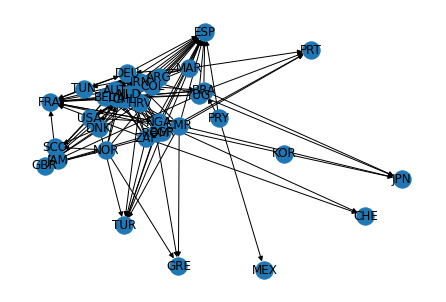

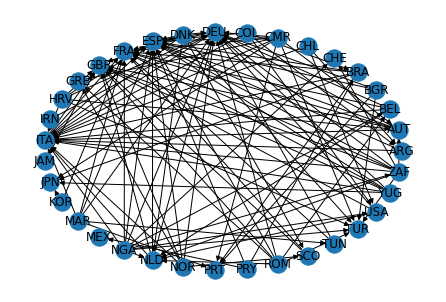

In [21]:
print (nx.info(G2))#football.net
nx.draw(G2, with_labels=1)
plt.show()
nx.draw_circular(G2, with_labels=1)
plt.show()

In [22]:
G3 = nx.read_pajek("karate.paj")
print (nx.info(G3))
print (nx.number_of_nodes(G3))
print (nx.number_of_edges(G3))
print (nx.is_directed(G3))

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
34
78
False


In [23]:
G4 = nx.read_graphml("wikipedia.graphml")
print (nx.info(G4))
print (nx.number_of_nodes(G4))
print (nx.number_of_edges(G4))
print (nx.is_directed(G4))


Name: 
Type: DiGraph
Number of nodes: 921
Number of edges: 1081
Average in degree:   1.1737
Average out degree:   1.1737
921
1081
True


Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 5
Average in degree:   1.2500
Average out degree:   1.2500
True


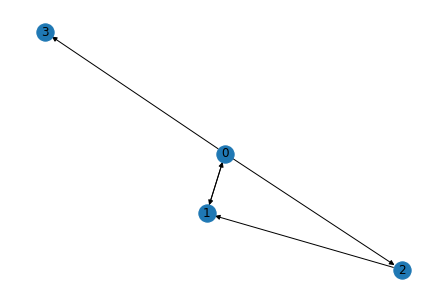

In [24]:
G5 = nx.read_gexf("data.gexf")
print (nx.info(G5))
print (nx.is_directed(G5))
nx.draw(G5,with_labels=1)
plt.show()

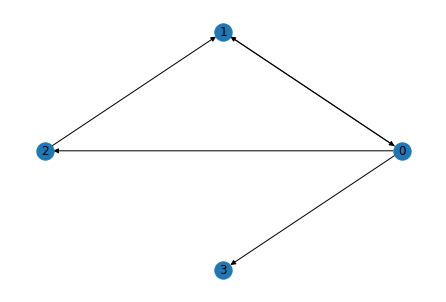

[('0', 4), ('1', 3), ('2', 2), ('3', 1)]
dict_values([4, 3, 2, 1])
Degree List :  [4, 3, 2, 1]


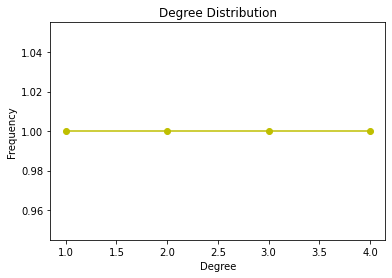

In [25]:
nx.draw_circular(G5, with_labels=1)
plt.show()

print(nx.degree(G5))
all_degree_list = dict(nx.degree(G5)).values()
print (all_degree_list)

def degree_distribution(G5):
    degree_count = []
    deg_set = dict(nx.degree(G5)).values()
    unique_deg_list = list(deg_set)
    print ("Degree List : ", unique_deg_list)
    
    for i in unique_deg_list: 
        x = list(all_degree_list).count(i)
        degree_count.append(x) 
        
    plt.plot(unique_deg_list, degree_count, 'yo-')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return

degree_distribution(G5) 

Degree List :  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
unique degree list :  [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
degree count :  [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


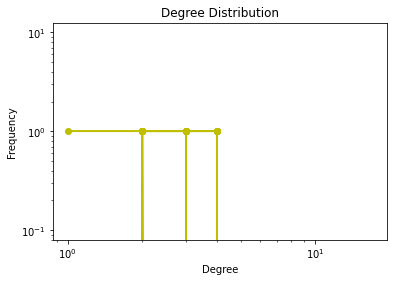

In [26]:
def degree_distribution(G):
    degree_count = []
    deg_set = dict(nx.degree(G3)).values()
    unique_deg_list = list(deg_set)
    print("Degree List : ", unique_deg_list)
    for i in unique_deg_list:
        x = list(all_degree_list).count(i)
        degree_count.append(x)
    print("unique degree list : ", unique_deg_list)
    print("degree count : ", degree_count)
    plt.loglog(unique_deg_list, degree_count, 'yo-')#plot between logx and logy
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()
    return

degree_distribution(G3)

### Density

In [27]:
G = nx.complete_graph(100)
print(nx.density(G))
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
print (nx.density(G))

1.0
0


In [28]:
print (nx.density(G5)) 

0.4166666666666667
